## **Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.Explore the relationships between variables and identify patterns and trends in the data.**

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [4]:
#Loading data set
df = pd.read_csv("titanic_data.csv")

**1. The Data Overview**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**2. Data Cleaning**

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age, cabin and embarked are the columns that needs cleaning

In [9]:
#Filling-in the data(Replacing The Nan Values)
df['Age'].fillna(df['Age'].median(),  inplace=True)  #replacing Nan values with median because numerical value
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)  #replacing value with mode 
df['Embarked'].fillna(df['Embarked'].mode()[0],  inplace=True) # #replacing value with mode 

As names are not necessary for the data analysis

In [10]:
#Drop column
df.drop(['Name'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**3. Exploratory Data Analysis**

Exploration of Survivers data 

In [15]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(f"Survival Rate:\n{survival_rate}")

Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


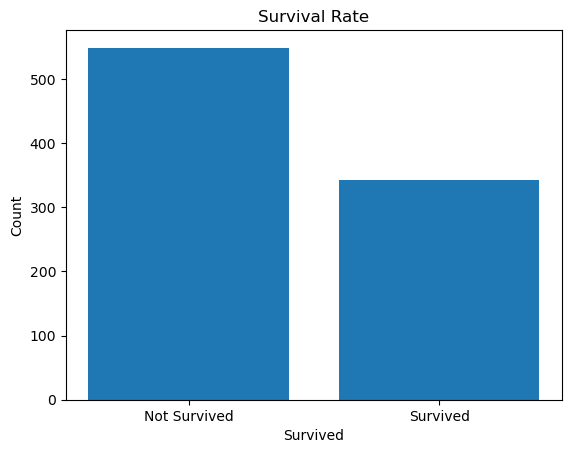

In [4]:
plt.bar(['Not Survived', 'Survived'], df['Survived'].value_counts())
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Rate')
plt.show()

Exploration of Sex of Passengers/Survivors

In [16]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
sex_survived = df.groupby('Sex')['Survived'].mean() * 100
print(f"Survival Rate by Sex:\n{sex_survived}")

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


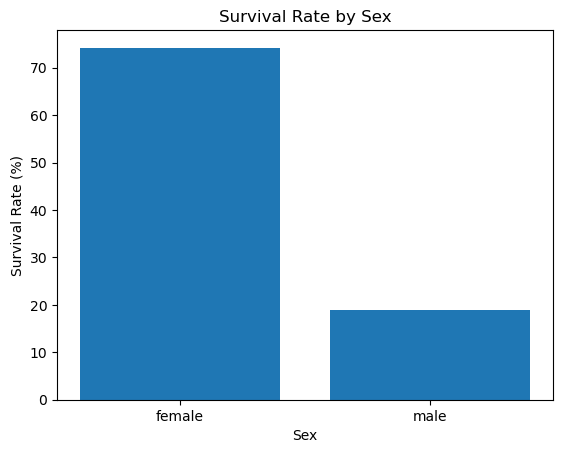

In [17]:
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

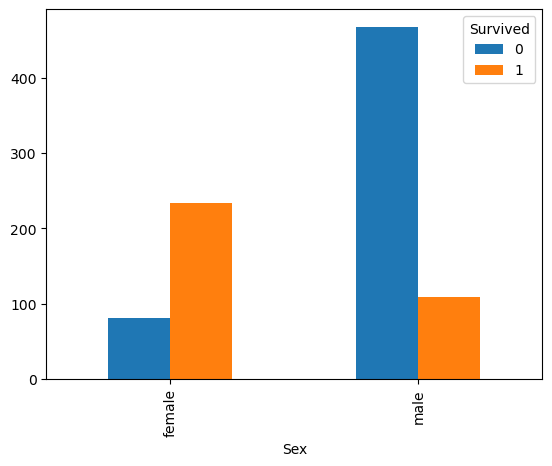

In [6]:
#Plot Distribution of "Sex" with "Survived"
survival_sex = df.groupby(['Sex', 'Survived']).size().unstack()
survival_sex.plot(kind="bar")
plt.show()

Exploration of Survived Passenger Class

In [16]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
pclass_survived = df.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")

Survival Rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


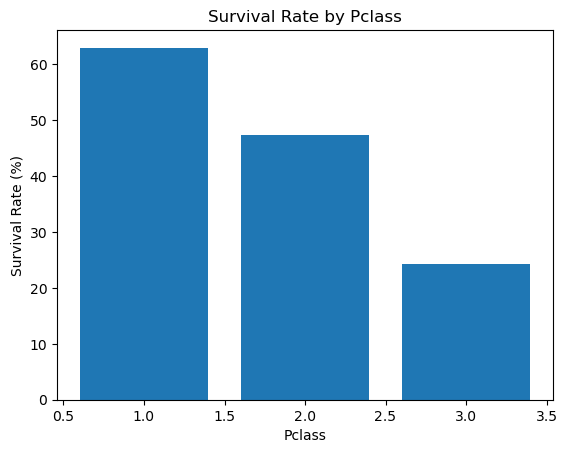

In [8]:
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

Exploration of Age of Passengers

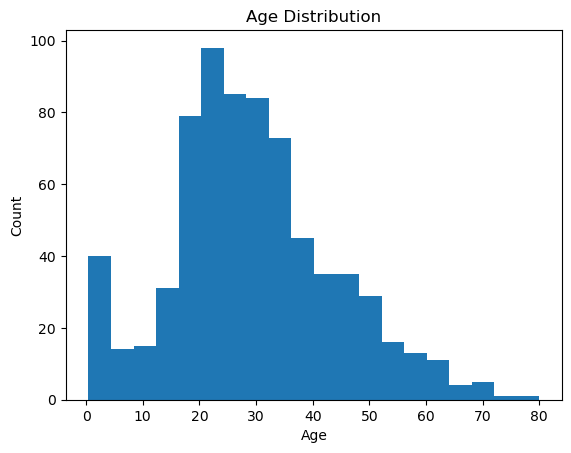

In [18]:
# Exploring the age distribution of passengers
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<Axes: >

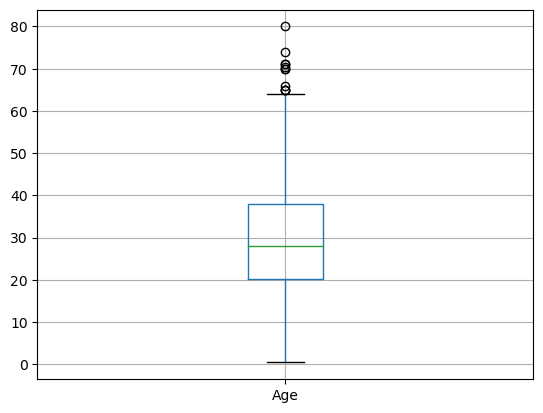

In [19]:
df[['Age']].boxplot()

**Exploring the relationships between the age of individuals, their survival status, and various categorical factors**

<Axes: xlabel='Sex', ylabel='Survived'>

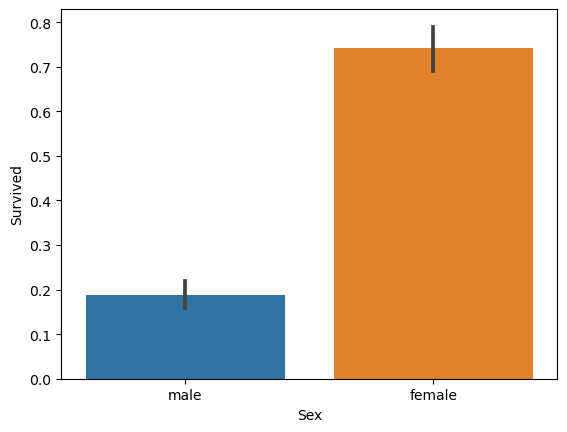

In [7]:
sns.barplot(x = "Sex",y= "Survived",data = df)

<Axes: xlabel='Embarked', ylabel='Survived'>

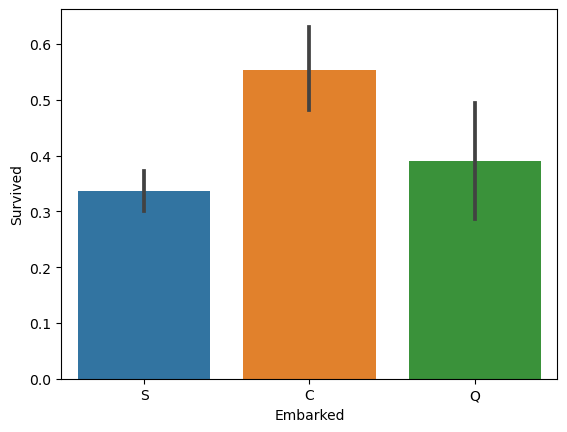

In [21]:
sns.barplot(x="Embarked",y="Survived",data=df)

<Axes: xlabel='Parch', ylabel='Survived'>

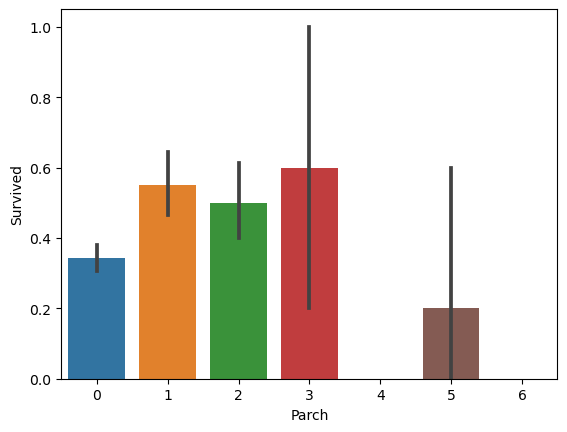

In [22]:
sns.barplot(x="Parch",y="Survived",data = df)

<Axes: xlabel='SibSp', ylabel='Survived'>

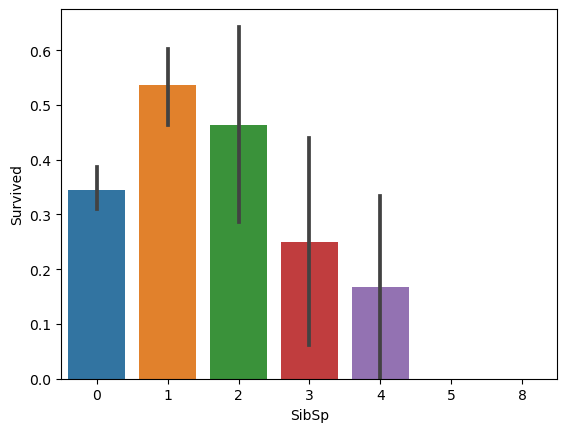

In [23]:
sns.barplot(x="SibSp",y="Survived",data=df)

<Axes: xlabel='Embarked', ylabel='Age'>

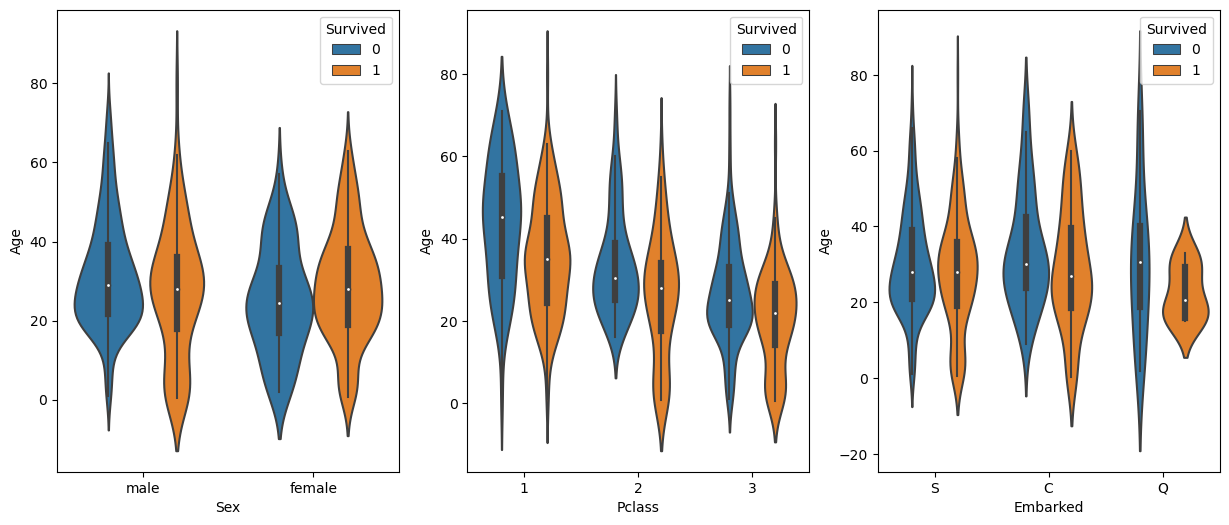

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.violinplot(x="Sex",y="Age",data=df,hue="Survived",split=False)
plt.subplot(1,3,2)
sns.violinplot(x='Pclass',y='Age',data=df,hue="Survived",split=False)
plt.subplot(1,3,3)
sns.violinplot(x="Embarked",y='Age',data=df,hue="Survived",split=False)